In [1]:
import os

# Change the current working directory
os.chdir('/Users/payalteyung/Desktop/DA')

# Verify the change
print(os.getcwd())

/Users/payalteyung/Desktop/DA


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
%matplotlib inline

In [3]:
#loading the csv data file into pandas dataframe
df=pd.read_csv('heart.csv',encoding='ISO-8859-1')

In [4]:
#printing the first 5 rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here,cp is chest pain type and there are 4 types.
0:typical angina.    
1:atypical angina.  
2:non-anginal pain.  
3:asypmtomatic      


restecg
0: normal.  
1: have ST-T wave abnormality.  
2: showing probable or definite left venticular hypertrophy by Estes' criteria


thalach: max heart rate achieved


exang:  exercise induced angina (1=yes, 0= no)


slope:  slope of peak exercise ST segment
1:upsloping
2:flat
3:downsloping

ca:number of major vessels

thal 
3: normal
6 : fixed defect
7 : reversable defect

target
0: less chance of heart attack
1: more chance of heart attack

In [5]:
#number of rows and colums
df.shape

(303, 14)

In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#the datatypes of the fileds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#Finding missing values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


there are no missing values


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df_duplicate = df.duplicated().any()
print(df_duplicate)

True


the output is true so, there are some duplicate values

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(302, 14)

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
#categorical feature analysis
categorical_list = ["sex", "cp","fbs","restecg","exang","slope","ca","thal","target"]

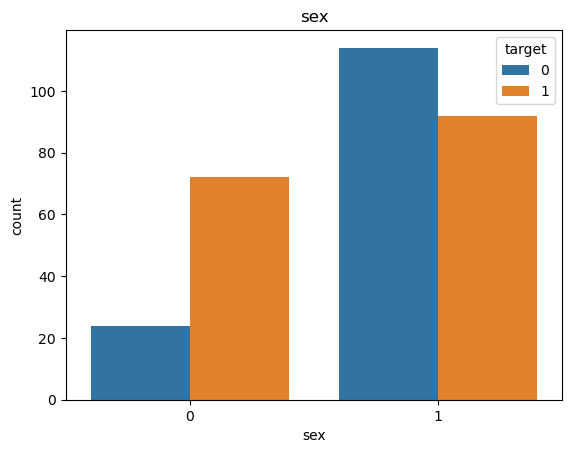

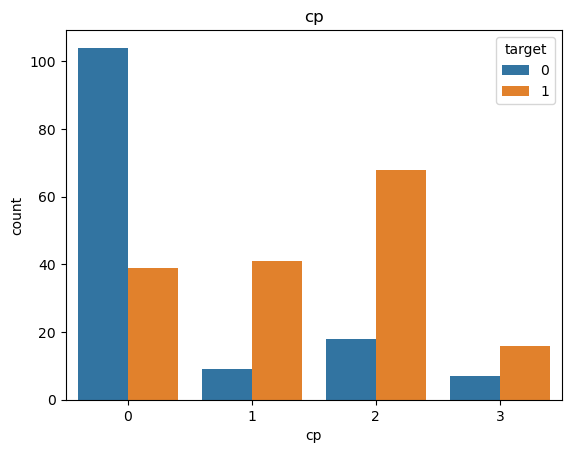

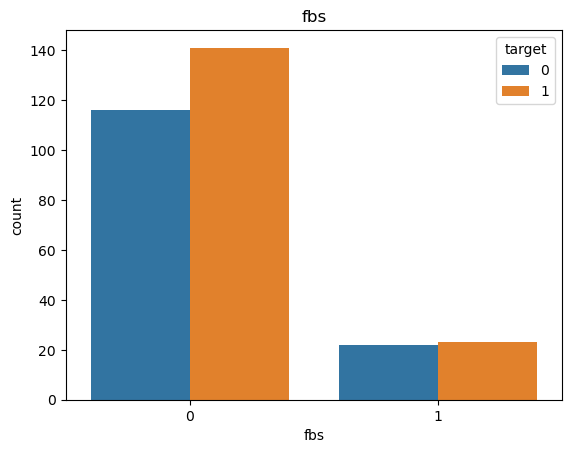

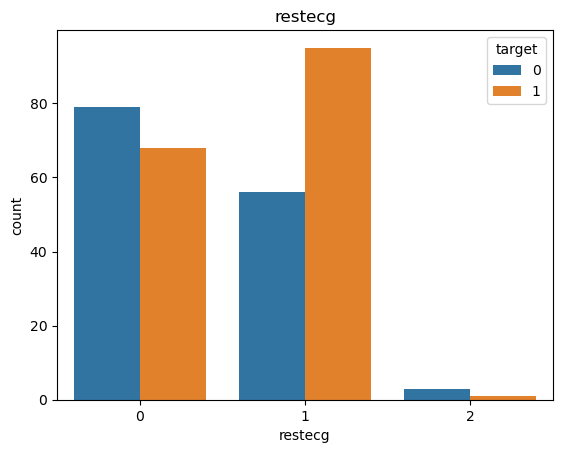

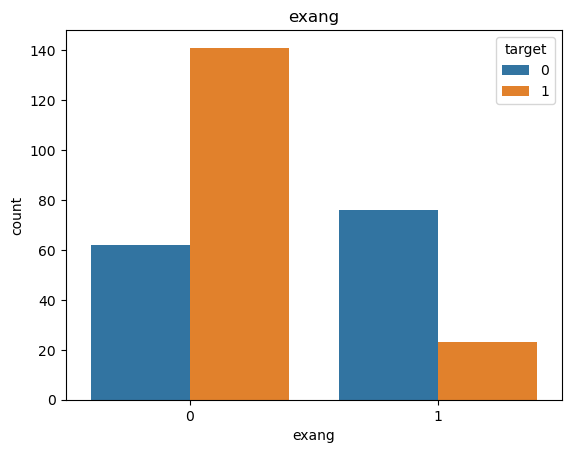

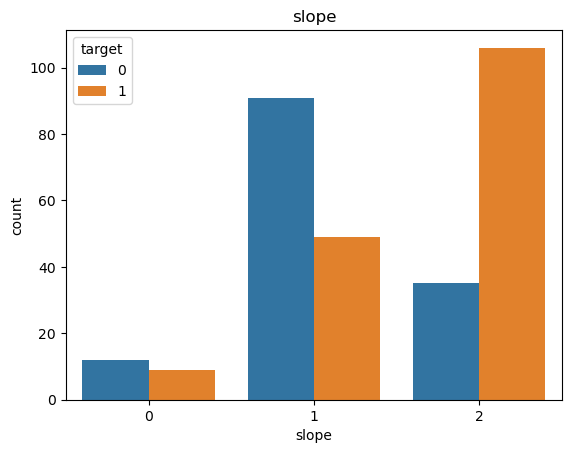

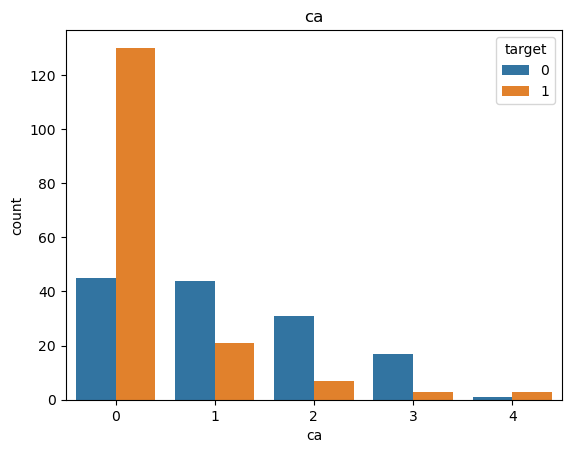

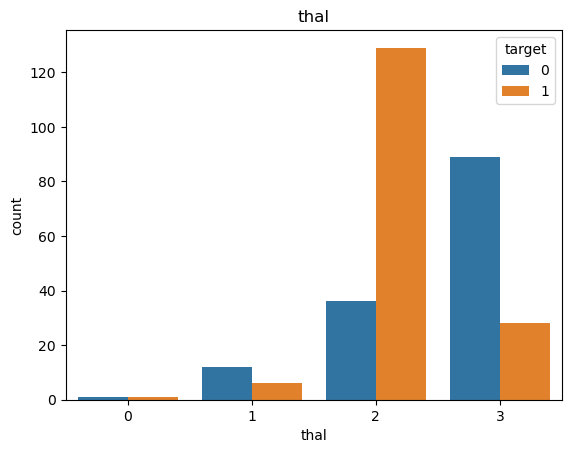

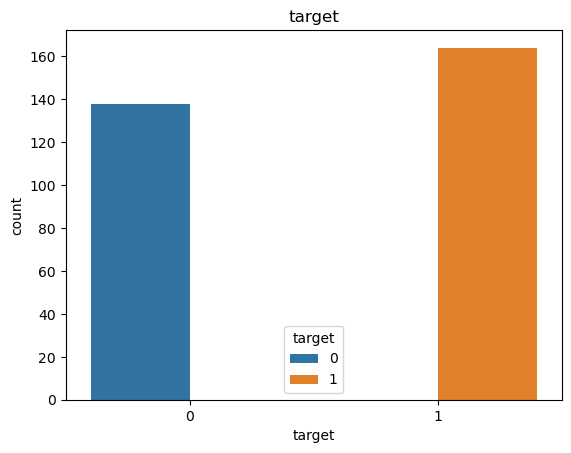

In [16]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "target")
    plt.title(i)

Here, we have plotted barplot for various categories in relation to the target. for example, for sex vs count 
the count of the females(represented by 0 ) have more  target 1,which means that there is more probability of heart
diseases in the females . 

In [17]:
#numerical feature analysis
numeric_list = ["age", "trestbps","chol","thalach","oldpeak","target"]

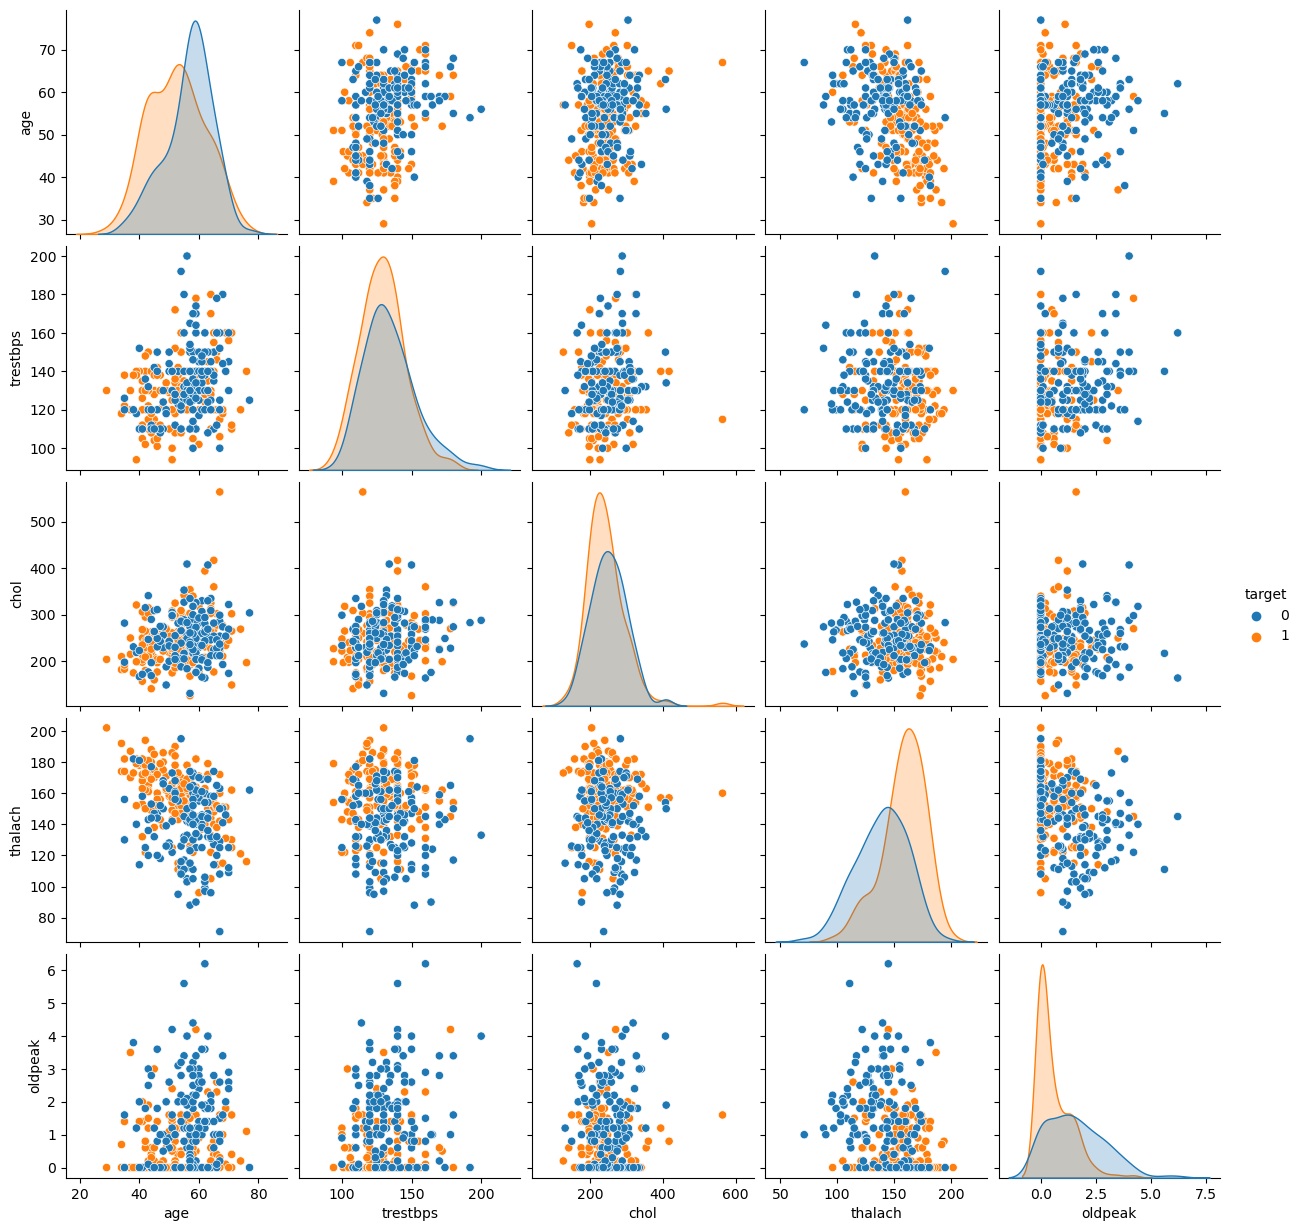

In [18]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "target", diag_kind = "kde")
plt.show()

The pair plot gives a comprehensive view of how different numerical features relate to each other and to the target variable. It can help to identify correlations and understand whether certain combinations of variables are better at distinguishing between target = 0 and target = 1.

Each scatter plot shows the relationship between two variables. For example, the scatter plot of age vs. trestbps shows how these two features relate, and the color coding helps show how the target values distribute across different combinations of age and resting blood pressure.

In [19]:
#drawing correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

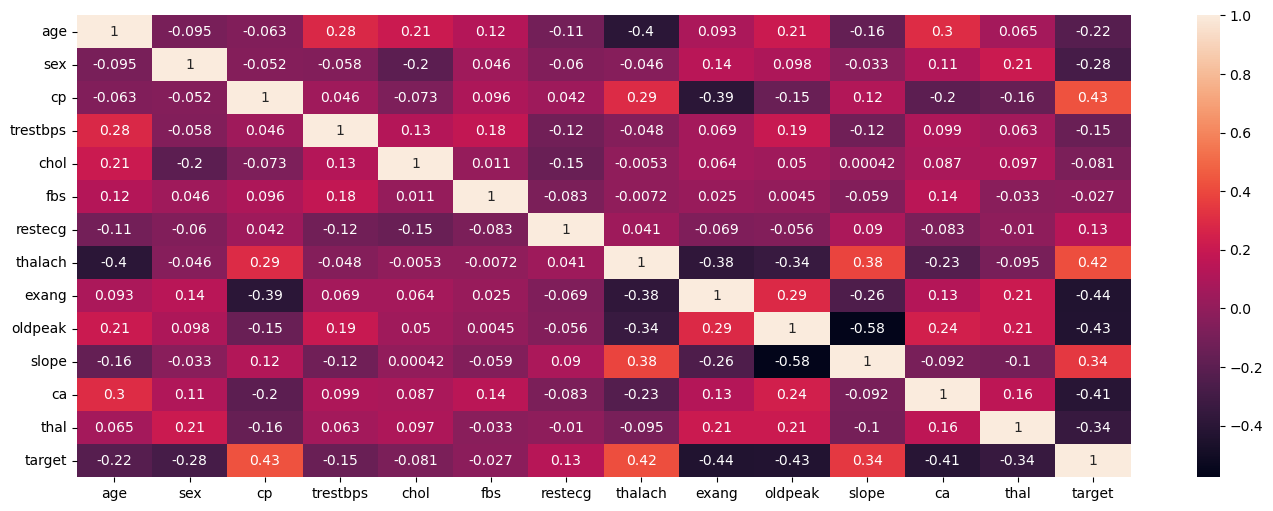

In [20]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

Here, cp,thalach and slope has positive high correlation with the target. This means that these datas highly influence the target. Also, age ,sex,exang,oldpeak,ca,thal has negative high corellation with target .

Whereas, tresrbps,chol,fbs are less correleated with the target.

In [21]:
#checking the distribution of target value
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

This means that 164 people have heart disease whereas 138 don't.

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
#count of total males and females
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

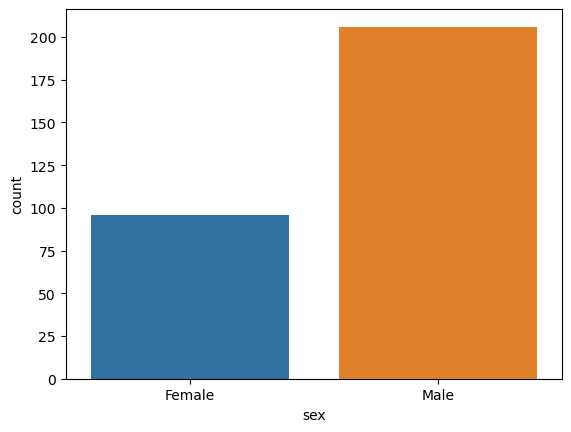

In [24]:
sns.countplot(x='sex', data=df)
plt.xticks([0,1],['Female','Male'])
plt.show()

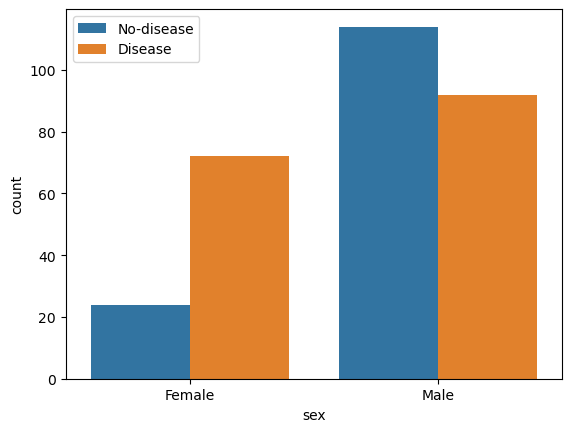

In [25]:
#gender distribution according to the target
sns.countplot(x='sex',hue="target",data=df)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-disease','Disease'])
plt.show()

This bar plot shows that among the the female population , more number of females are prone to heart diseases whereas, among the total population of male there are less males prone to heart disease.But overall,the population of the male is higher and so is the disease count as well as no-disease count.

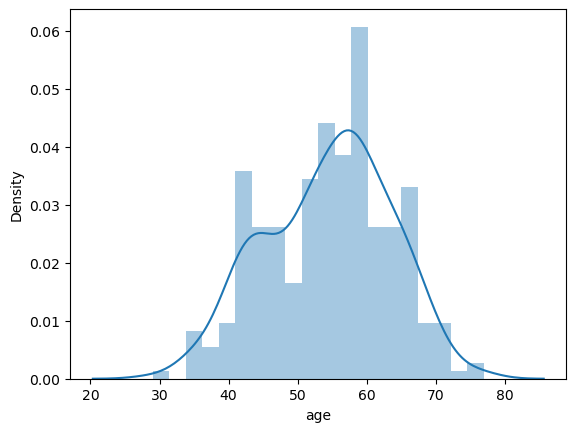

In [26]:
#age distribution on the dataset
sns.distplot(df['age'],bins=20)
plt.show()

Here, we can see that the age group of 50-60 ar more in the dataset

<Axes: xlabel='cp', ylabel='count'>

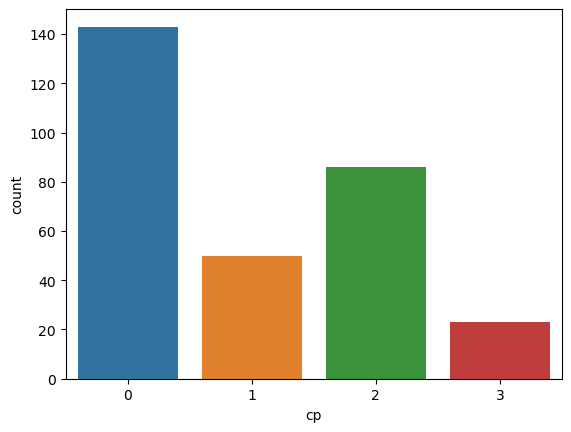

In [27]:
#finding most commo0n chest pain type
sns.countplot(x='cp',data=df)

We can see that chest pain of type 0 is most common, which is 'typical angina' pain and most uncommon type of chest pain is type3 which is 'asymptomatic'.

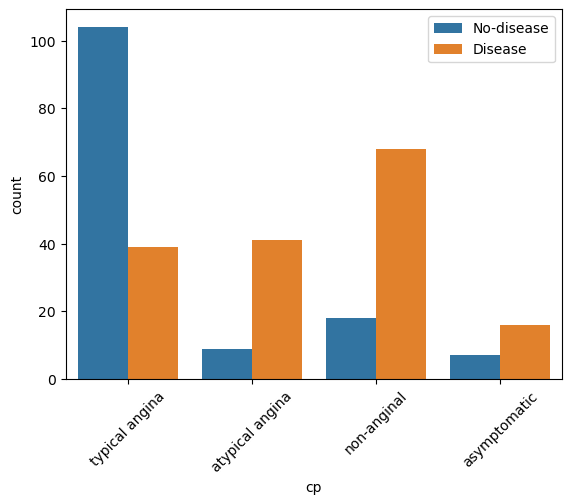

In [28]:
#chest pain distribution as per target variable
sns.countplot(x='cp',hue="target",data=df)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal','asymptomatic'])
plt.xticks(rotation=45)
plt.legend(labels=['No-disease','Disease'])
plt.show()

From the plot above we can see that non-anginal chest pain are more prone to heart disease whereas typical angina pain is most common but has less chance of heart disease as per the total population. Also, asymptomatic pain in most uncommon one but as per the total population it has more chance of having heart diseases.

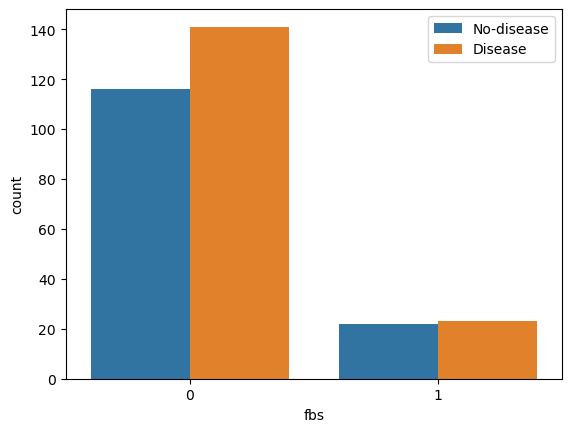

In [29]:
#fasting blood sugar distribution according to the target variables

sns.countplot(x='fbs',hue="target",data=df)
plt.legend(labels=['No-disease','Disease'])
plt.show()

Here, 1 means more than 120mg/dl and 0 is less than 120mg/dl. Here, we can see that maximum number of heart disease patient are not diabetic.

<Axes: >

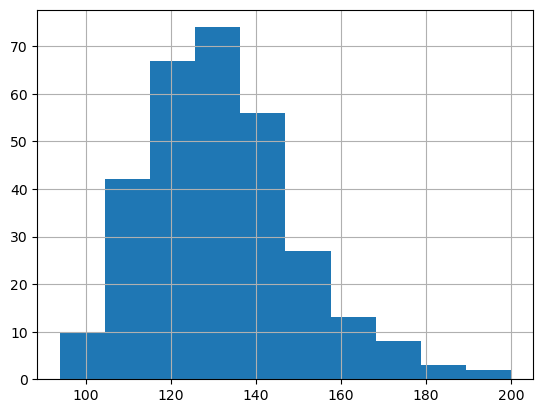

In [30]:
#resting blood pressure distribution
df['trestbps'].hist()

This shows that the resting blood pressure is between 120 to 130

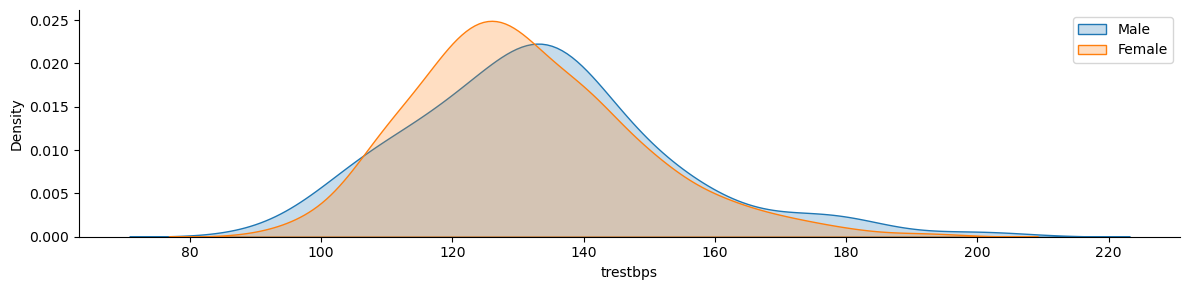

In [31]:
#comparing resting blood pressure as per sex
g=sns.FacetGrid(df,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])
plt.show()

This shows that the resting blood pressure of female is around 120 and male is around 140.

In [32]:
# splitting features and target
X=df.drop(columns='target',axis=1)
Y= df['target']

In [33]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [34]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


In [35]:
#splitting the data into training data and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(302, 13) (241, 13) (61, 13)


Here, test_size= 0.2 which means we are taking 20% of the total data set as testing data set. 

stratify=Y means that the Y data set is split in even manner through training and test data .

random_state=2 to split data in specific manner.



# Model Training

#logistic regression 

In [37]:
model=LogisticRegression()

In [38]:
model.fit(X_train,Y_train)

LogisticRegression()

This will find the pattern and relationship among the features of the given dataset and corresponding target.

# Model Evaluation

#accuracy score

In [39]:
#accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [40]:
print('Accuracy on training data :',training_data_accuracy )

Accuracy on training data : 0.8506224066390041


Here we can see the accuracy on training data is 85% . 

In [41]:
#accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [42]:
print('Accuracy on training data :',test_data_accuracy )

Accuracy on training data : 0.819672131147541


Here the difference in the accuracy on training data and test data is neither overfitted nor underfitted . so, the difference is acceptable.

In [43]:
#precision
X_train_precision = precision_score(X_train_prediction,Y_train, average='weighted') 

In [44]:
print('Precision on training data :',X_train_precision )


Precision on training data : 0.8589470774387312


In [45]:
X_test_precision = precision_score(X_test_prediction,Y_test, average='weighted') 

In [46]:
print('Precision on test data :',X_test_precision )

Precision on test data : 0.8197253566106025


# Building a predictive system

In [47]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#changing the input data to a numpy array

numpy_array = np.asarray(input_data)

#reshape the numpy array as we predicting for only one instance
reshaped = numpy_array.reshape(1,-1)

prediction = model.predict(reshaped)
print(prediction)

if(prediction[0]==0):
    print("The person doesnot have heart disease")
else:
    print("The person has heart disease")
    

[1]
The person has heart disease


saving the trained model

In [48]:
import pickle

In [49]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [50]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [51]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#changing the input data to a numpy array

numpy_array = np.asarray(input_data)

#reshape the numpy array as we predicting for only one instance
reshaped = numpy_array.reshape(1,-1)

prediction = loaded_model.predict(reshaped)
print(prediction)

if(prediction[0]==0):
    print("The person doesnot have heart disease")
else:
    print("The person has heart disease")

[1]
The person has heart disease
